In [15]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
# 1. Import the dataset using Pandas from the given URL
url = "https://raw.githubusercontent.com/SR1608/Datasets/main/covid-data.csv"
df = pd.read_csv(url)

In [4]:
# 2. High Level Data Understanding:
# a. Find no. of rows & columns in the dataset
num_rows, num_columns = df.shape

# b. Data types of columns.
data_types = df.dtypes

# c. Info & describe of data in dataframe.
data_info = df.info()
data_description = df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57394 entries, 0 to 57393
Data columns (total 49 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   iso_code                            57071 non-null  object 
 1   continent                           56748 non-null  object 
 2   location                            57394 non-null  object 
 3   date                                57394 non-null  object 
 4   total_cases                         53758 non-null  float64
 5   new_cases                           56465 non-null  float64
 6   new_cases_smoothed                  55652 non-null  float64
 7   total_deaths                        44368 non-null  float64
 8   new_deaths                          56465 non-null  float64
 9   new_deaths_smoothed                 55652 non-null  float64
 10  total_cases_per_million             53471 non-null  float64
 11  new_cases_per_million               56401

In [6]:
# 3. Low Level Data Understanding :
# a. Find count of unique values in location column.
unique_location_count = df['location'].nunique()

# b. Find which continent has maximum frequency using values counts.
max_continent_frequency = df['continent'].value_counts().idxmax()

# c. Find maximum & mean value in 'total_cases'.
max_total_cases = df['total_cases'].max()
mean_total_cases = df['total_cases'].mean()

# d. Find 25%,50% & 75% quartile value in 'total_deaths'.
quartiles_total_deaths = df['total_deaths'].quantile([0.25, 0.5, 0.75])

# e. Find which continent has maximum 'human_development_index'.
max_hdi_continent = df.loc[df['human_development_index'].idxmax()]['continent']

# f. Find which continent has minimum 'gdp_per_capita'.
min_gdp_continent = df.loc[df['gdp_per_capita'].idxmin()]['continent']

In [7]:
# 4. Filter the dataframe with only specified columns
selected_columns = ['continent', 'location', 'date', 'total_cases', 'total_deaths', 'gdp_per_capita', 'human_development_index']
df = df[selected_columns]

In [8]:
# 5. Data Cleaning
# a. Remove all duplicates observations
df = df.drop_duplicates()

# b. Find missing values in all columns
missing_values = df.isnull().sum()

# c. Remove all observations where continent column value is missing
df = df.dropna(subset=['continent'])

# d. Fill all missing values with 0
df = df.fillna(0)

In [9]:
# 6. Date time format :
# a. Convert date column in datetime format using pandas.to_datetime
df['date'] = pd.to_datetime(df['date'])

# b. Create new column month after extracting month data from date column.
df['month'] = df['date'].dt.month

In [10]:
# 7. Data Aggregation:
# a. Find max value in all columns using groupby function on 'continent' column
df_groupby = df.groupby('continent').max().reset_index()

In [11]:
# 8. Feature Engineering :
# a. Create a new feature 'total_deaths_to_total_cases' by ratio of 'total_deaths' column to 'total_cases'
df_groupby['total_deaths_to_total_cases'] = df_groupby['total_deaths'] / df_groupby['total_cases']


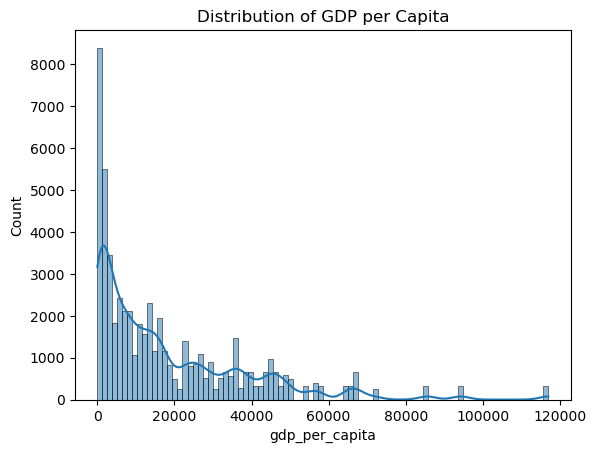

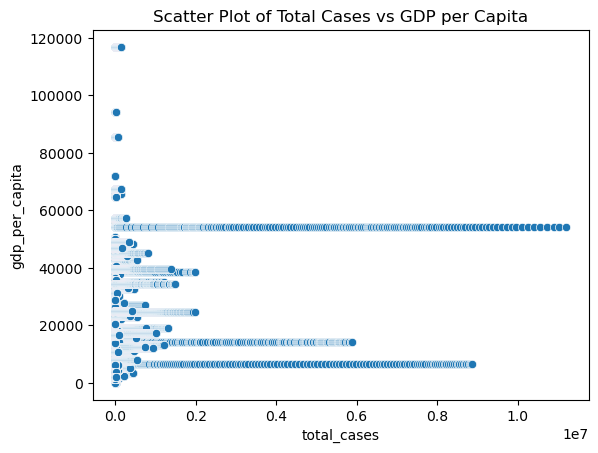

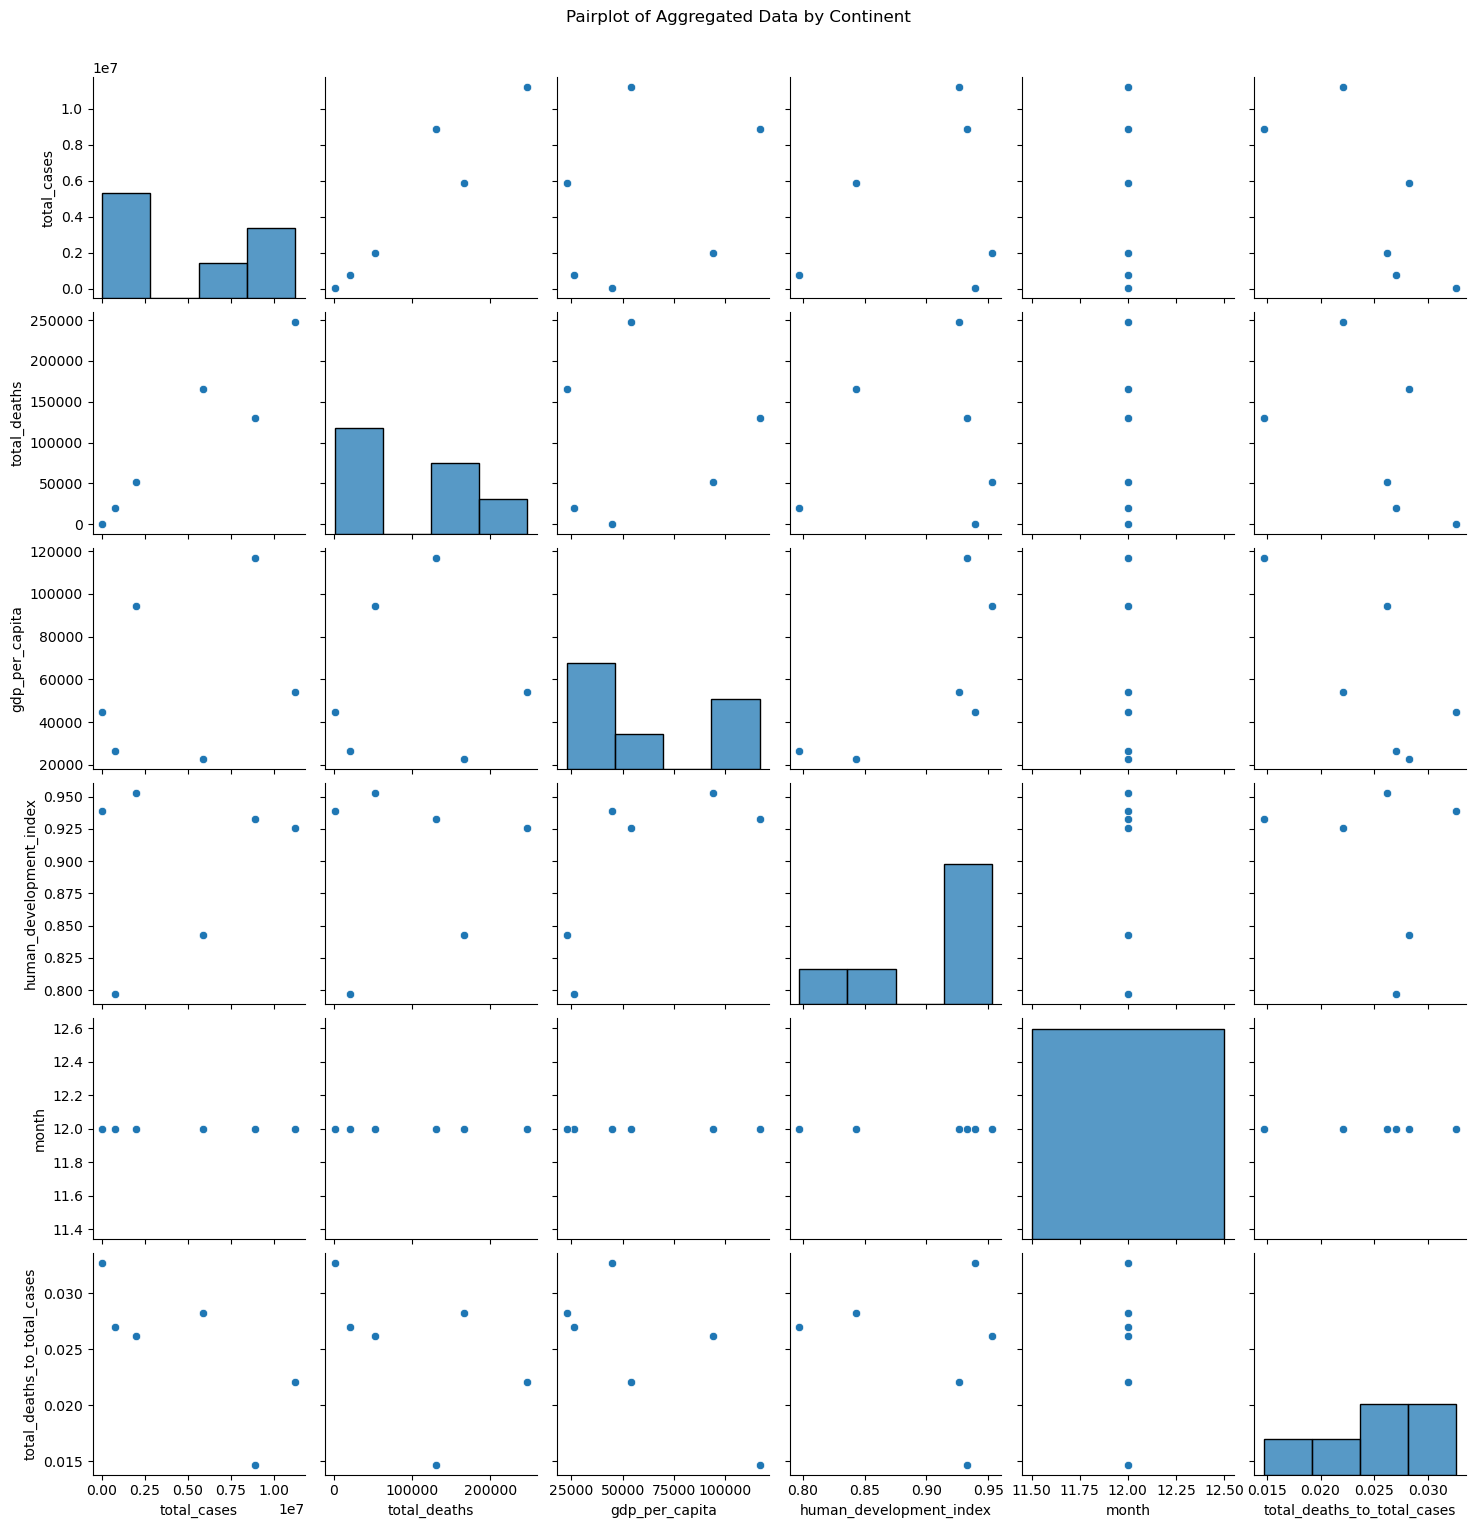

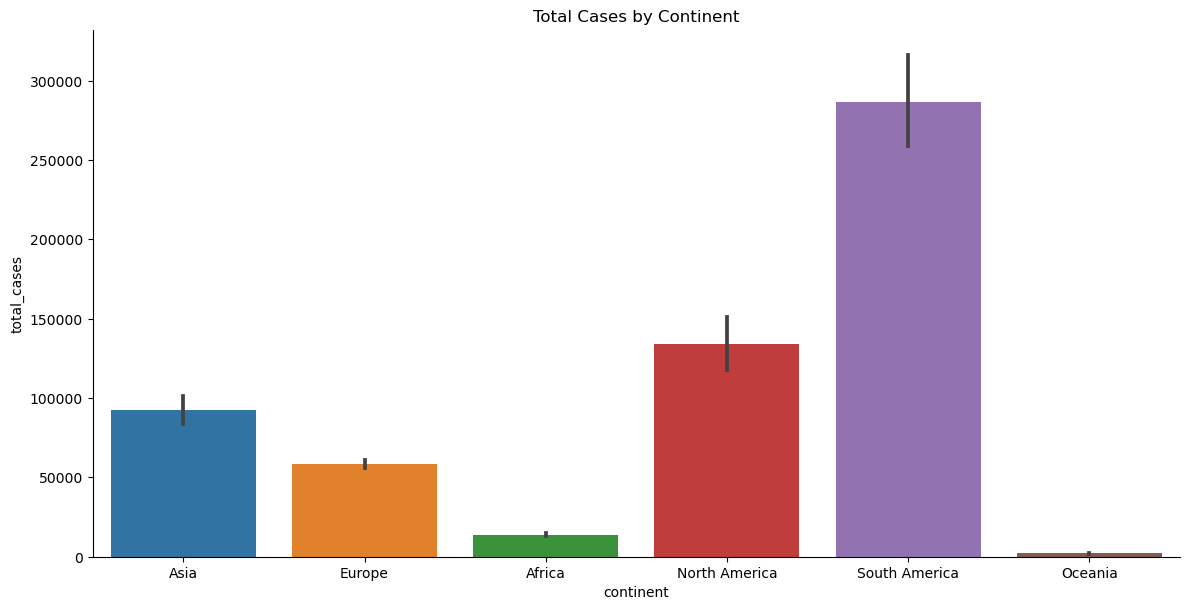

In [12]:
# 9. Data Visualization :
# a. Perform Univariate analysis on 'gdp_per_capita' column by plotting histogram using seaborn dist plot.
sns.histplot(df['gdp_per_capita'], kde=True)
plt.title('Distribution of GDP per Capita')
plt.show()

# b. Plot a scatter plot of 'total_cases' & 'gdp_per_capita'
sns.scatterplot(x='total_cases', y='gdp_per_capita', data=df)
plt.title('Scatter Plot of Total Cases vs GDP per Capita')
plt.show()

# c. Plot Pairplot on df_groupby dataset.
sns.pairplot(df_groupby)
plt.suptitle('Pairplot of Aggregated Data by Continent', y=1.02)
plt.show()

# d. Plot a bar plot of 'continent' column with 'total_cases'.
sns.catplot(x='continent', y='total_cases', kind='bar', data=df, height=6, aspect=2)
plt.title('Total Cases by Continent')
plt.show()

In [19]:
# 10. Save the df_groupby dataframe in your local drive using pandas.to_csv function
df_groupby.to_csv('df_groupby.csv', index=False)
